<a href="https://colab.research.google.com/github/JasonMullen/Data-Science-Projects/blob/main/Breast_Cancer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Background Info
1. What is the difference between Logistic and Linear Regression:

Linear regression is used to predict a continuous dependent variable while

logistic regression is used to predict a categorical dependent variable. Linear regression is used for Regression tasks while Logistic regression is used for Classification tasks.

2. What is the difference between predictors and response variables?

Response variables are variables that we are trying to predict, it’s our “y” when we create our models. For example, in the Iris data set we are trying to predict what species the iris is, so our response variable will be “species”. Predictor variables are those that we use to predict the response variable. Again let’s use the iris data set example, the predictor variables if we’re trying to find the species would be, petal length, petal width, sepal length and sepal width.

3. What is the purpose and benefits of preprocessing data?

The purpose of preprocessing the data is to make it more usable. We check for missing variables and fill in their values or drop the columns entirely if they’re missing too much data. We create dummy variables for categorical variables so we can use them in our model along quantitative variables. We can also scale our data if necessary. The benefits of this is that we will have a better understanding of our data which helps us create a better model.

4. What is overfitting and underfitting the data? What are the consequences?

Overfitting is when you make a model that has really good performance on the training set, but when you test it on the test set the performance is poor. Underfitting the data is even worse, the model performs poorly on the training set, thus it performs poorly on the test set as well. The consequences of overfitting or underfitting a model is that it doesn’t work when you want to use it on new data. It will predict very poorly, making it worthless.



# Part 2: About the Data

1. What are the features? Response variable? Describe each.
Answer: The response variable is diagnosis. All the features are listed below.

SNOWFALL

2. Which features would you classify as categorical vs. continuous? Explain.
Answer: All the features are continuous. All the features represent numerical values that fall along an infinite range of values, thus they are continuous. The only variable that is categorical is the response variable, Diagnosis.




# Problem statement:
Cancer, a life-ending disease, needs to be detected as early as possible in order to provide effective treatment and save lives. Because of the time it takes to receive a diagnosis of potentially cancerous cells, we need to find ways to quickly detect signs of cancer in its early stages. With various measurements taken from previous diagnostic tests, we seek to determine whether or not it is possible to identify patients that are more likely to have cancer. With this information, doctors may be able to identify these kinds of patients and prioritize them accordingly.



# Part 3: Data Exploration

Import the data and print its first 5 rows.

In [ ]:
#LOGISTIC REGRESSION
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [ ]:
data = pd.read_csv('/content/data.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

In [ ]:
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Questions:
1. Are there any missing values?
Answer: Yes, all the values in Unnamed: 32 are missing.

2. Any null values?
Answer: Yes, all the values in Unnamed: 32 are NaN

3. How many unique values are there for each column?
Answer: The Diagnosis column, which contains 2 unique variables(B and M). The other columns contain 569 values - they have all unique values.



# Plots
Create a boxplot for ejection_fraction. What does this plot tell you? Any outliers? Do they need to be removed, if so, why? (or why not?). Repeat this for time and serum creatinine. Report your conclusions from each plot.



Text(0.5, 1.0, 'Concave Points')

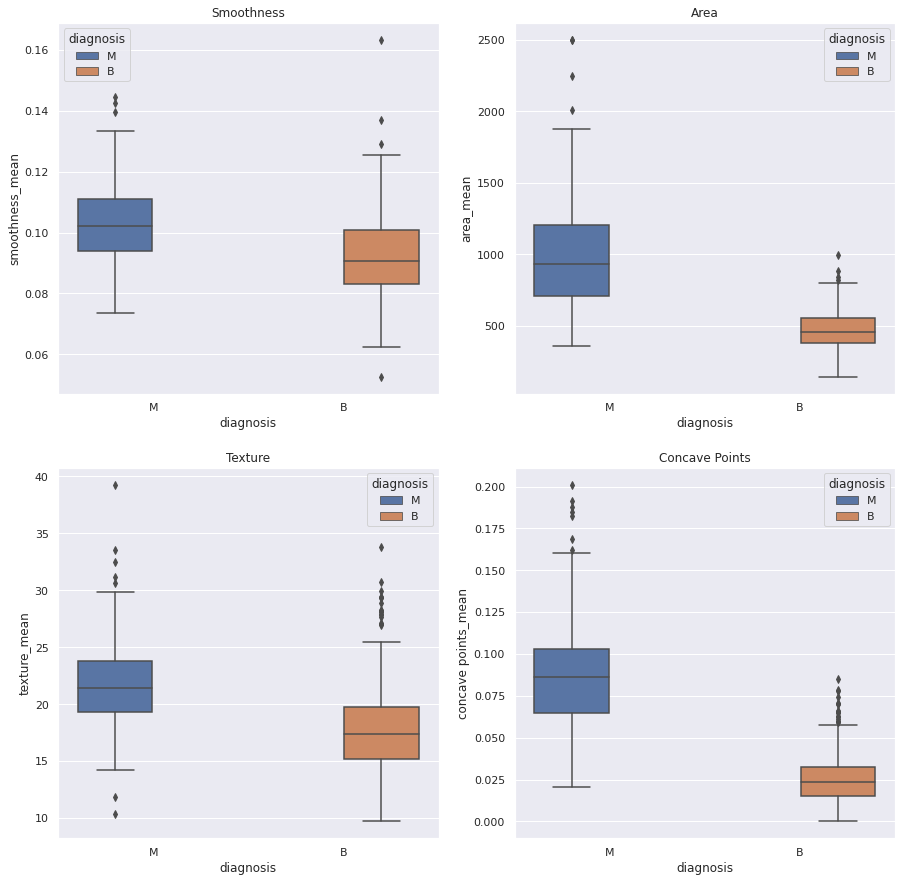

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
sns.boxplot(data=data, y= 'smoothness_mean',x='diagnosis',hue='diagnosis', ax=axes[0][0])
sns.boxplot(data=data,y= 'area_mean',x='diagnosis',hue='diagnosis', ax=axes[0][1])
sns.boxplot(data=data,y= 'texture_mean',x='diagnosis',hue='diagnosis', ax=axes[1][0])
sns.boxplot(data=data,y= 'concave points_mean',x='diagnosis', hue='diagnosis',ax=axes[1][1])
axes[0][0].set_title('Smoothness')
axes[0][1].set_title('Area')
axes[1][0].set_title('Texture')
axes[1][1].set_title('Concave Points')

Boxplot 1: We can see that the average is around 0.09 for benign and about 0.1 for Malignant. There are a couple outliers mainly with higher values. Since the average of both malignant and benign are overlapping, this may not be as good of a predictor as some of the others.

Boxplot 2: This plot shows us that the average for malignant cancer is around 1000 while it's around 500 for benign. We can use this information to deduce that larger tumors are more often cancerous than smaller tumors. There also are a couple outliers for both diagnoses that have much higher values than the rest. Since the averages are so far apart and we can make a clear distinction between the two diagnoses this would make a very good predictor.

Boxplot 3 tells us that there are notable differences between the benign and malignant tumor ranges based on the texture_mean. 75% of benign tumors fall below 20, while 75% of malignant tumors are above 19. This indicates that the texture mean might be a good metric by which to determine whether a tumor is malignant.
However, there are several outliers towards the upper end of the scale. Because these are relevant when determining how useful the texture_mean is for determining the likelihood of a tumor being malignant vs benign, they should be included in our graph.

Boxplot 4 tells us that there are extremely significant differences between benign and malignant tumor ranges based on the concave points_mean. 75% of malignant tumors have a concave points_mean above roughly 0.0625, which is greater than the entire expected variance for benign tumors. There are many outliers however. The outliers in the upper end of the benign tumors are significant, as they show that it may be difficult to conclusively determine if a tumor is benign until roughly 0.0875. These should be included as they are very relevant for diagnosing tumors.

# Plots
Create a pie chart for every categorical variable. Report your conclusions from each plot. Is working with a balanced dataset important? Why or why not? How can we deal with an imbalanced dataset?



Text(0.5, 1.0, 'Diagnosis pie chart')

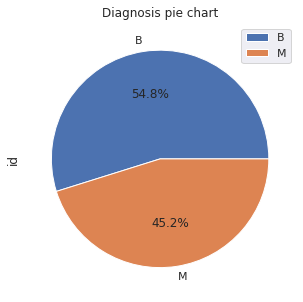

In [ ]:
data.groupby(['diagnosis']).sum().plot(kind='pie', y = 'id', autopct = '%1.1f%%')
plt.title('Diagnosis pie chart')

Conclusion: 54.8% of patients had a begnin(non cancerous) tumor, while 45.2% of the patients had malignant(cancerous) tumors.



# Plots
Create distribution plots of the numerical variables. Below is an example. Report your conclusions from each plot.




Text(0.5, 1.0, 'Fractal Dimension Count')

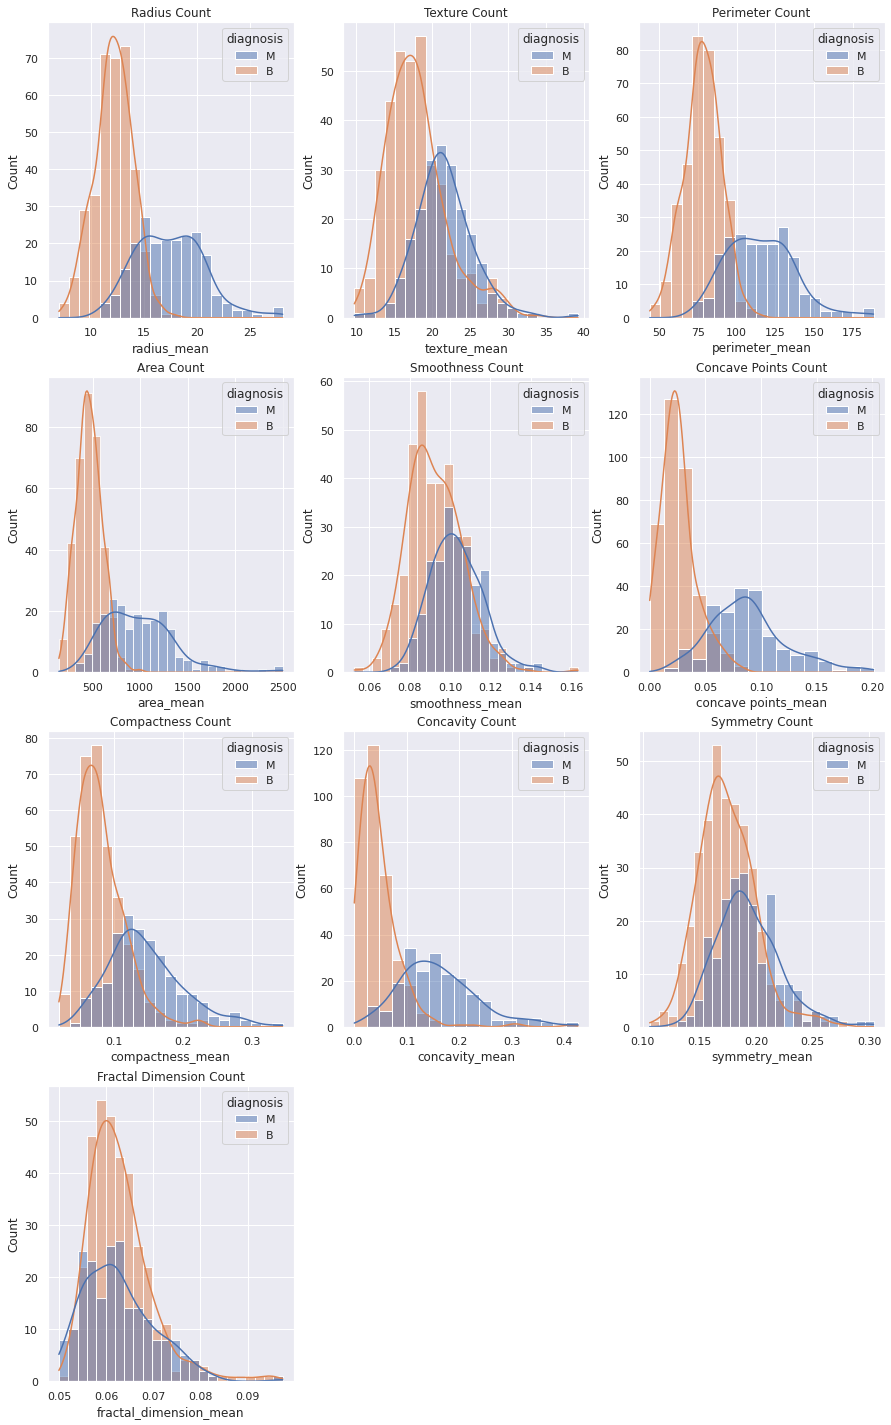

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 25),sharey=False)
sns.histplot( x=data['radius_mean'],hue=data['diagnosis'], kde=True,ax=axes[0][0])
sns.histplot( x=data['texture_mean'],hue=data['diagnosis'], kde=True,ax=axes[0][1])
sns.histplot( x=data['perimeter_mean'],hue=data['diagnosis'], kde=True,ax=axes[0][2])
sns.histplot( x=data['area_mean'],hue=data['diagnosis'], kde=True,ax=axes[1][0])
sns.histplot( x=data['smoothness_mean'],hue=data['diagnosis'], kde=True,ax=axes[1][1])
sns.histplot( x=data['concave points_mean'],hue=data['diagnosis'], kde=True,ax=axes[1][2])
sns.histplot( x=data['compactness_mean'],hue=data['diagnosis'], kde=True,ax=axes[2][0])
sns.histplot( x=data['concavity_mean'],hue=data['diagnosis'], kde=True,ax=axes[2][1])
sns.histplot( x=data['symmetry_mean'],hue=data['diagnosis'], kde=True,ax=axes[2][2])
sns.histplot( x=data['fractal_dimension_mean'],hue=data['diagnosis'], kde=True,ax=axes[3][0])
fig.delaxes(axes[3][1]) 
fig.delaxes(axes[3][2])
axes[0][0].set_title('Radius Count')
axes[0][1].set_title('Texture Count')
axes[0][2].set_title('Perimeter Count')
axes[1][0].set_title('Area Count')
axes[1][1].set_title('Smoothness Count')
axes[1][2].set_title('Concave Points Count')
axes[2][0].set_title('Compactness Count')
axes[2][1].set_title('Concavity Count')
axes[2][2].set_title('Symmetry Count')
axes[3][0].set_title('Fractal Dimension Count')

We observe that there is a significant separation between the benign and malignant tumors in the graphs of:

1. radius_ mean
2. perimeter_mean
3. area_mean
4. concave points_mean
5. concavity_mean.
6. There is also moderate/mild separation in the compactness_mean attribute.
These plots indicate that the above-mentioned features are likely to be the most important for diagnosis.

# Plots
Plots
Create a heatmap of the data. What does it tell you?

Define multicollinearity. Is there multicollinearity in our dataset? Why do we care? How did you check?

Text(0.5, 1.0, 'Heat Map')

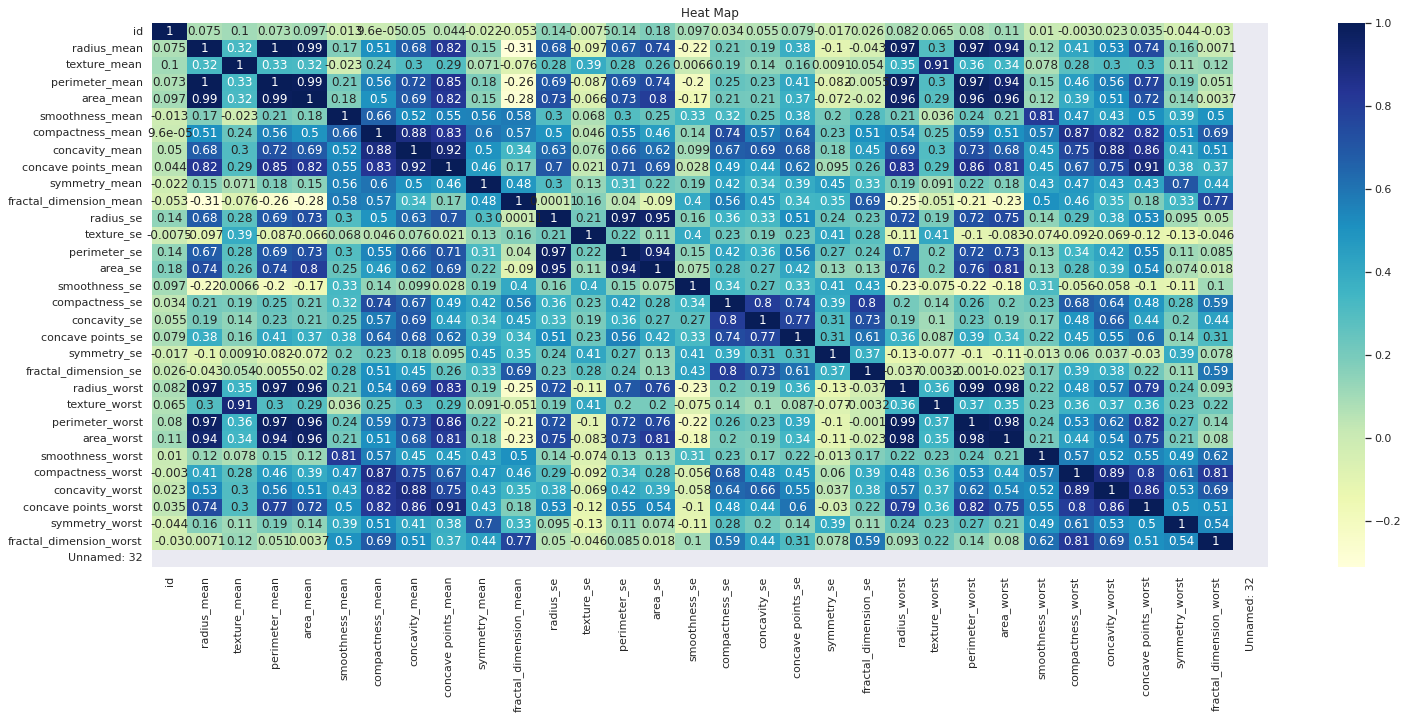

In [ ]:
plt.figure(figsize = (25,10))
sns.heatmap(data.corr(), annot =True, cmap="YlGnBu").set_title('Heat Map')

Multicollinearity occurs when two or more variables are highly correlated. We see there is a very significant amount of collinearity within the heat map. Many of the variables refer to similar/synonymous data and so we intend to drop those columns and replace them with others. Some examples include:

COLLINEAR - radius_mean ++ perimeter_mean ++ area_mean ++ radius_worst ++ concave points_mean

COLLINEAR - perimeter_mean ++ area_mean ++ perimeter_worst ++ area_worst

COLLINEAR - covcave_worst ++ concave points_worst ++ perimeter_worst ++ compactness_worst

COLLINEAR - texture_worst and texture_mean are significantly collinear at 0.91.

# Plots
Create at least 2 plots of your choice and give a brief summary of your conclusions from each plot. Example: scatterplot.



Text(0.5, 1.0, 'Smoothness vs Concavity')

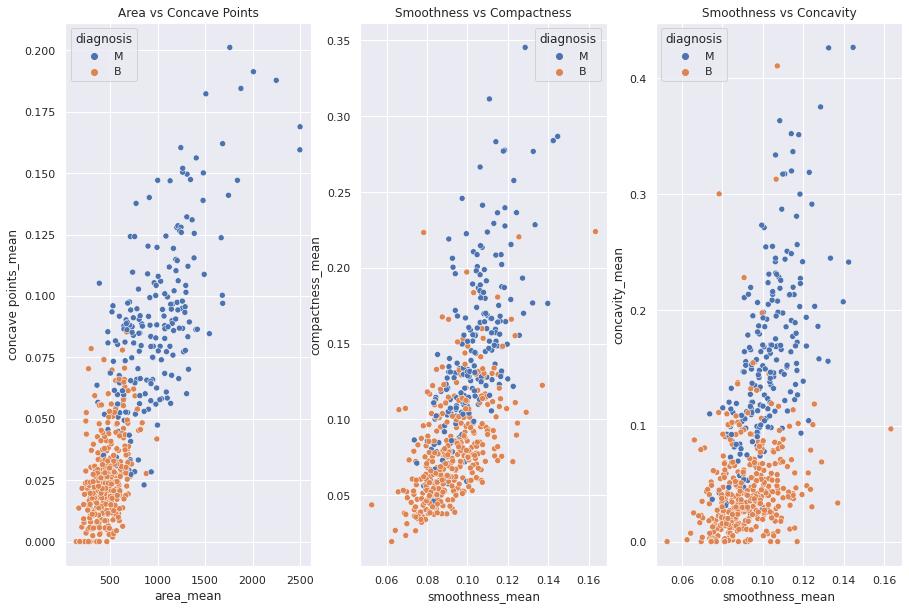

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10),sharey=False)
sns.scatterplot(data=data, x='area_mean', y='concave points_mean', hue='diagnosis',ax=axes[0])
sns.scatterplot(data=data, x='smoothness_mean', y='compactness_mean', hue='diagnosis',ax=axes[1])
sns.scatterplot(data=data, x='smoothness_mean', y='concavity_mean', hue='diagnosis',ax=axes[2])
axes[0].set_title('Area vs Concave Points')
axes[1].set_title('Smoothness vs Compactness')
axes[2].set_title('Smoothness vs Concavity')

In [ ]:
from scipy import stats

print(stats.pearsonr(data['area_mean'], data['concave points_mean']))
print(stats.pearsonr(data['smoothness_mean'], data['compactness_mean']))
print(stats.pearsonr(data['smoothness_mean'], data['concavity_mean']))

PearsonRResult(statistic=0.8232688686524334, pvalue=1.4910192291835667e-141)
PearsonRResult(statistic=0.6591232152159225, pvalue=3.403822261701273e-72)
PearsonRResult(statistic=0.5219837677142596, pvalue=4.370346237354534e-41)


There is a very strong positive correlation between area_mean and concave points_mean.

There is a strong positive correlation between smoothness_mean and compactness_mean.

There is a moderate positive correlation between smoothness_mean and concavity_mean.

# Scaling
1. Is it necessary to scale the data? What benefits would it provide?
It is important/necessary because it makes it easier for the model to learn and understand the problem.

2. Which scaler will you use for this data set? Min Max, Standard, Robust, etc.
For our project we used Standard Scaler.

3. Are the features or the response variables scaled?
The feature variables are scaled, while the response variables are not.

Don’t forget to split your data into test-train splits before scaling!


In [ ]:
from sklearn.preprocessing import StandardScaler

x = data[['radius_mean','texture_mean','smoothness_mean','concave points_mean',
         'compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean']]
y = data['diagnosis']

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(data=x_scaled, columns=x.columns)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Preprocessing
1. Which columns needed to be modified (dummy variables)?
Answer: None of our columns need to be modified; they are all quantitative. The only quantitative variable is diagnosis which is our response variable. Additionally, we drop the Unnamed: 32 column as it has no values.

2. What are parametric and nonparametric learning algos? For the models you are choosing- are they parametric or nonparametric? Explain.
Answer: Logistic Regression is parametric and Decision trees are nonparametric. Parametric models are pretty simple, they aim to use the training data to get the best coefficients possible to fit a model. Non parametric models are harder to fit and understand. Non parametric models don't make any assumptions about the model form.

3. Define label encoding and one hot encoding and compare them.
Answer: One hot encoding converts the values to either 1 or 0, so instead of having a column for countries you would have a bunch of columns with the country names. Label encoding would convert the same example to multiple numbers, ie you would keep the column countrynames and each country would be assigned a number. Both should only be used if order does not matter. But if the number of unique values in the column is too large label encoding should be used to prevent excessive memory usage. If the number of unique values is low one hot encoding should be used

# Model
Perform logistic regression and one other model you’ve learned in class to solve the problem statement.

Apply any necessary encoding, scaling, and train test splits to your data and construct the 2 models you selected. Provide a classification report and confusion matrix for both models.

Explain why you picked the model you chose. Use cross validation (see sklearn’s cross_val_score) to compare the models, show accuracy scores, etc...

# Logistic Regression
The reason we picked Logistic Regression is because it estimates the probability of an event occurring. For instance it can tell us whether someone voted or not. While specifically in this case it tells us if someone’s Tumor is either Cancerous or non-cancerous.

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=2000)
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [ ]:
predictions = logmodel.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           B       0.95      0.98      0.96        90
           M       0.96      0.91      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

[[88  2]
 [ 5 48]]


In [ ]:
from sklearn.metrics import accuracy_score
lm_pred = logmodel.predict(x_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, lm_pred)))


Model accuracy score: 0.9510


Confusion matrix

 [[88  2]
 [ 5 48]]


<AxesSubplot:title={'center':'Logistic Regression Confusion Matrix'}>

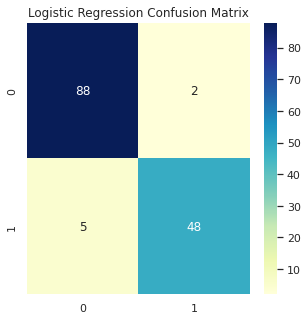

In [ ]:
#print our confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print('Confusion matrix\n\n', cm)
plt.figure(figsize = (5,5))
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(cm, annot=True,  cmap="YlGnBu")

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logmodel, x, y, cv=3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.93 (+/- 0.03)


In [ ]:
print(scores)


[0.91578947 0.95263158 0.92592593]


# Random Forest
We also chose Random forest forests because it performs excellently on classification problems.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
from sklearn.metrics import accuracy_score
rfc_pred = rfc.predict(x_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, rfc_pred)))


Model accuracy score: 0.9301


In [ ]:
#get classification report
from sklearn.metrics import classification_report

print(classification_report(y_test,rfc_pred))


              precision    recall  f1-score   support

           B       0.95      0.93      0.94        90
           M       0.89      0.92      0.91        53

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



Confusion matrix

 [[84  6]
 [ 4 49]]


<AxesSubplot:title={'center':'Random Forest Confusion Matrix'}>

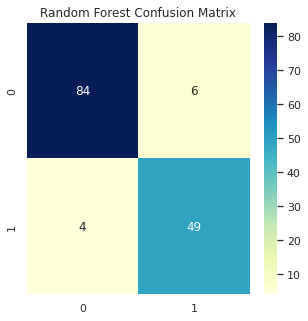

In [ ]:
#print our confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rfc_pred)
print('Confusion matrix\n\n', cm)
plt.figure(figsize = (5,5))
plt.title('Random Forest Confusion Matrix')
sns.heatmap(cm, annot=True,  cmap="YlGnBu")


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, x, y, cv=3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.93 (+/- 0.04)


In [ ]:
print(scores)


[0.90526316 0.93157895 0.95767196]


# Conclusion
Our models show whether a tumor is either malignant or benign.

It is significant because being able to predict with a high accuracy whether a patient has a cancerous tumor or not is very important. It would allow doctors to prioritize patients who are more at-risk.

Our Logistic Regression model has an accuracy of approximately 95%, while Random forests has an accuracy of approximately 93%.

In order to expand on our work, we’d run some more classification algorithms on our data in hopes of creating more accurate models.